In [1]:
pip install numpy pandas scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist

# Load the dataset
data = pd.read_csv(r'E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\CSV Files Step by Step\Step 3 Clustering.csv')  # Replace with your file path

# Columns to include for clustering
columns = ["Age", "Height", "Weight", "family_history", "Meals", "Smoker", "Alcohol"]

# Extract the features
X = data[columns].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN Model
dbscan = DBSCAN(eps=0.1, min_samples=13)  # Adjust parameters as needed
labels = dbscan.fit_predict(X_scaled)

# Filter noise points
non_noise_indices = labels != -1
X_filtered = X_scaled[non_noise_indices]
labels_filtered = labels[non_noise_indices]

# Metrics Calculation
if len(set(labels_filtered)) > 1:  # Ensure there is more than one cluster
    silhouette = silhouette_score(X_filtered, labels_filtered)
    davies_bouldin = davies_bouldin_score(X_filtered, labels_filtered)
    
    # Dunn Index Calculation
    def dunn_index(data, labels):
        unique_labels = np.unique(labels)
        clusters = [data[labels == label] for label in unique_labels]
        inter_cluster_distances = [
            np.min(cdist(clusters[i], clusters[j]))
            for i in range(len(clusters))
            for j in range(i + 1, len(clusters))
        ]
        intra_cluster_distances = [
            np.max(cdist(cluster, cluster))
            for cluster in clusters
        ]
        return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    
    dunn = dunn_index(X_filtered, labels_filtered)

    # Print Results
    print(f"Silhouette Score: {silhouette:.2f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
    print(f"Dunn Index: {dunn:.2f}")
else:
    print("DBSCAN found no valid clusters (or only one cluster). Metrics cannot be calculated.")


Silhouette Score: 0.87
Davies-Bouldin Index: 0.14
Dunn Index: 1.37


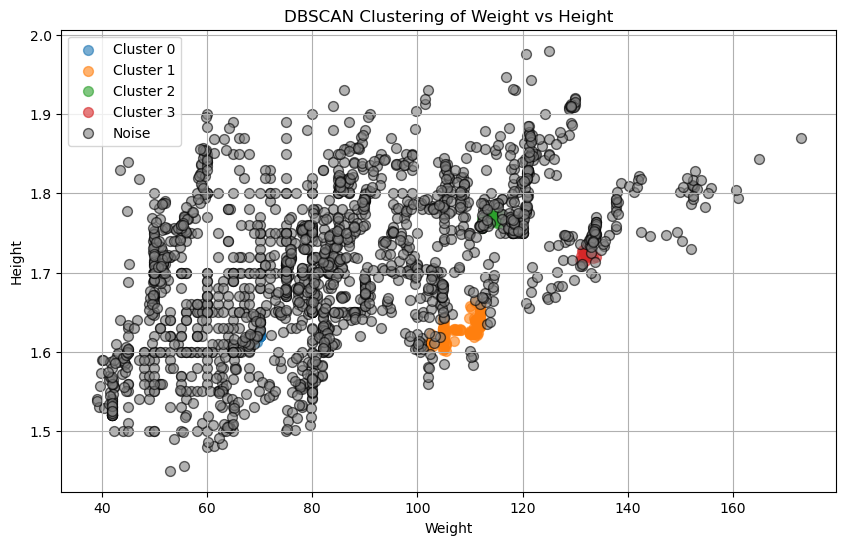

In [23]:
import matplotlib.pyplot as plt

# Ensure labels and original data are available
data['Cluster'] = labels  # Add cluster labels to the DataFrame

# Scatter plot for clusters
plt.figure(figsize=(10, 6))

unique_labels = set(labels)
for label in unique_labels:
    if label == -1:  # Noise points
        plt.scatter(
            data[data['Cluster'] == label]['Weight'],
            data[data['Cluster'] == label]['Height'],
            color='gray', label='Noise', s=50, alpha=0.6, edgecolors='k'
        )
    else:
        plt.scatter(
            data[data['Cluster'] == label]['Weight'],
            data[data['Cluster'] == label]['Height'],
            label=f'Cluster {label}', s=50, alpha=0.6
        )

plt.title('DBSCAN Clustering of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.read_csv(r'E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\CSV Files Step by Step\Step 3 Clustering.csv')  # Replace with your file path

# Columns to include for clustering
columns = ["Age", "Height", "Weight", "family_history", "Meals", "Smoker", "Alcohol"]

# Extract the features
X = data[columns].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN Model
eps = 0.1  # Maximum distance for neighborhood
min_samples = 13  # Minimum number of points to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# Count the total clusters (excluding noise)
unique_labels = set(labels)
total_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise (-1)

# Print the total clusters
print(f"DBSCAN identified {total_clusters} clusters (excluding noise).")

# Optional: Display counts of points per cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()
print("\nCluster counts (including noise):")
print(cluster_counts)


DBSCAN identified 4 clusters (excluding noise).

Cluster counts (including noise):
-1    1926
 0      18
 1     126
 2      24
 3      16
dtype: int64
